# Q1: New customer segmentation analysis

You have a customer segmentation available at your company that segments every customer in one of the 6 customer segments (A, B, C, D, E and F). The goal of the analysis is to see how well the new customers you acquired in 2019, of each segment, performed compared to each other. You should analyse the number of new accounts per segment as well as their revenue per segment. You are free to represent this in the way you think that is the most appropriate to share some insights. You have 2 csv files (“STATS406_Assignment_1.1_clients.csv” & “STATS406_Assignment_1.1_transactions.csv”) at your disposal. The first one contains: your new client information (with the first and last name of the employee of your client company that has signed the deal) as well as its unique client id number and its customer segment. The second file contains all transactions of 2019, performed by those new customers, with the client id, the transaction date and transaction amount. You are asked to perform the analysis on the full year of 2019 as a total (i.e. NOT showing a granularity by month or quarter, but just on the full year of 2019). Consequently, you will have to aggregate the data per customer segment for the year 2019.

In [343]:
#!pip install -U pandasql
#!pip install --upgrade pandas
#!conda install pandas=0.20.4
#pd.show_versions()

In [344]:
import pandas as pd
import pandasql as psql
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import calendar
import matplotlib.patches as mpatches

In [345]:

import matplotlib.pylab as pylab
params = {'legend.fontsize': 10,
         'axes.labelsize': 14,
         'axes.titlesize':15,
         'xtick.labelsize':11,
         'ytick.labelsize':11}
pylab.rcParams.update(params)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

In [346]:
clients_df = pd.read_csv("STATS406_Assignment_1.1_clients.csv")

In [347]:
clients_df.head()

,ClientId,FirstName,LastName,Customer_segment
0,24770,Vonnie,Zamor,F
1,48607,Seth,Rhode,A
2,44822,Rafaela,Kwon,D
3,16050,Tamala,Youngren,F
4,9474,Regine,Meade,C


In [348]:
clients_df.shape

(1088, 4)

In [349]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ClientId          1088 non-null   int64 
 1   FirstName         1088 non-null   object
 2   LastName          1088 non-null   object
 3   Customer_segment  1088 non-null   object
dtypes: int64(1), object(3)
memory usage: 34.1+ KB


In [350]:
clients_df.describe()

,ClientId
count,1088.000000
mean,24405.289522
std,14452.005855
min,78.000000
25%,11801.500000
50%,24401.000000
75%,36514.250000
max,49857.000000


In [351]:
clients_df['ClientId'].nunique()

1088

In [352]:
clients_df.isnull().values.any()

False

In [353]:
transactions_df = pd.read_csv("STATS406_Assignment_1.1_transactions.csv")
#transactions_df['TransactionDate'] =  pd.to_datetime(transactions_df['TransactionDate'], infer_datetime_format=True)

In [354]:
transactions_df.head()
#transactions_df['TransactionDate'][1]

,ClientId,TransactionDate,TransactionAmount
0,24705,2019-05-03,33348
1,14693,2019-06-05,34416
2,37448,2019-11-11,36140
3,37606,2019-09-10,40985
4,21218,2019-07-10,37688


In [355]:
transactions_df.shape

(2719, 3)

In [356]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ClientId           2719 non-null   int64 
 1   TransactionDate    2719 non-null   object
 2   TransactionAmount  2719 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 63.9+ KB


In [357]:
transactions_df.describe()

,ClientId,TransactionAmount
count,2719.000000,2719.000000
mean,25145.732990,6877.623759
std,14156.630466,12569.612896
min,78.000000,326.000000
25%,13030.000000,444.000000
50%,25267.000000,2721.000000
75%,37028.000000,7815.500000
max,49857.000000,104304.000000


In [358]:
transactions_df.isnull().values.any()

False

In [359]:
clients_transactions_df = pd.merge(clients_df, transactions_df, on='ClientId')

In [360]:
clients_transactions_df.head()

,ClientId,FirstName,LastName,Customer_segment,TransactionDate,TransactionAmount
0,24770,Vonnie,Zamor,F,2019-11-06,1706
1,24770,Vonnie,Zamor,F,2019-01-18,326
2,24770,Vonnie,Zamor,F,2019-07-15,326
3,48607,Seth,Rhode,A,2019-11-04,27801
4,48607,Seth,Rhode,A,2019-02-13,15942


In [361]:
clients_transactions_df.describe()

,ClientId,TransactionAmount
count,2719.000000,2719.000000
mean,25145.732990,6877.623759
std,14156.630466,12569.612896
min,78.000000,326.000000
25%,13030.000000,444.000000
50%,25267.000000,2721.000000
75%,37028.000000,7815.500000
max,49857.000000,104304.000000


In [362]:
clients_transactions_df.isnull().values.any()

False

In [363]:
clients_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2719 entries, 0 to 2718
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ClientId           2719 non-null   int64 
 1   FirstName          2719 non-null   object
 2   LastName           2719 non-null   object
 3   Customer_segment   2719 non-null   object
 4   TransactionDate    2719 non-null   object
 5   TransactionAmount  2719 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 148.7+ KB


In [364]:
clients_transactions_df['ClientId']

0       24770
1       24770
2       24770
3       48607
4       48607
        ...  
2714    46187
2715    46187
2716     4030
2717    34475
2718    34475
Name: ClientId, Length: 2719, dtype: int64

In [365]:
clients_transactions_df.shape

(2719, 6)

In [366]:
clients_transactions_df['ClientId'].nunique()

1088

In [367]:
clients_transactions_df.groupby('Customer_segment').describe()

ClientId                                               \
                    count          mean           std     min      25%   
Customer_segment                                                         
A                   192.0  26416.651042  13222.544146   805.0  15470.0   
B                    48.0  20839.895833  14377.284187  2034.0   9485.0   
C                   845.0  24299.951479  14123.076912    99.0  12281.0   
D                  1062.0  26075.125235  14330.025942   183.0  13590.0   
E                    60.0  25315.250000  11796.311158   766.0  16040.0   
F                   512.0  24521.052734  14283.362062    78.0  11888.0   

                                             TransactionAmount                \
                      50%       75%      max             count          mean   
Customer_segment                                                               
A                 26011.0  37395.50  48975.0             192.0  24375.015625   
B                 14955.5  32398.00  49818.0              48.0  81874.979167   
C                 24288.0  36701.00  49785.0             845.0   7076.990533   
D                 25862.0  39296.25  49857.0            1062.0   2646.105461   
E                 27106.0  35625.00  47010.0              60.0   6166.650000   
F                 25446.0  34993.00  49851.0             512.0   1816.478516   

                                                                               
                           std      min       25%      50%      75%       max  
Customer_segment                                                               
A                 10013.657196   1013.0  17378.75  24455.5  30605.0   52401.0  
B                 10329.454181  61837.0  72870.25  81522.5  88452.5  104304.0  
C                  6115.023027    804.0    804.00   6042.0  11242.0   28176.0  
D                  2815.945573    444.0    444.00   1257.5   4430.5   14806.0  
E                  5902.795884    800.0    800.00   4137.0   9806.5   22068.0  
F                  2110.700579    326.0    326.00    398.0   2894.0   11427.0

In [368]:
clients_transactions_df.head()

,ClientId,FirstName,LastName,Customer_segment,TransactionDate,TransactionAmount
0,24770,Vonnie,Zamor,F,2019-11-06,1706
1,24770,Vonnie,Zamor,F,2019-01-18,326
2,24770,Vonnie,Zamor,F,2019-07-15,326
3,48607,Seth,Rhode,A,2019-11-04,27801
4,48607,Seth,Rhode,A,2019-02-13,15942


In [369]:
clients_transactions_df.groupby('Customer_segment').mean()['TransactionAmount']

Customer_segment
A    24375.015625
B    81874.979167
C     7076.990533
D     2646.105461
E     6166.650000
F     1816.478516
Name: TransactionAmount, dtype: float64

In [370]:
clients_transactions_df.groupby('Customer_segment').count()

,ClientId,FirstName,LastName,TransactionDate,TransactionAmount
Customer_segment,,,,,
A,192,192,192,192,192
B,48,48,48,48,48
C,845,845,845,845,845
D,1062,1062,1062,1062,1062
E,60,60,60,60,60
F,512,512,512,512,512


In [371]:
clients_transactions_df[clients_transactions_df['Customer_segment'] == 'C'][['TransactionAmount']].sum()

TransactionAmount    5980057
dtype: int64

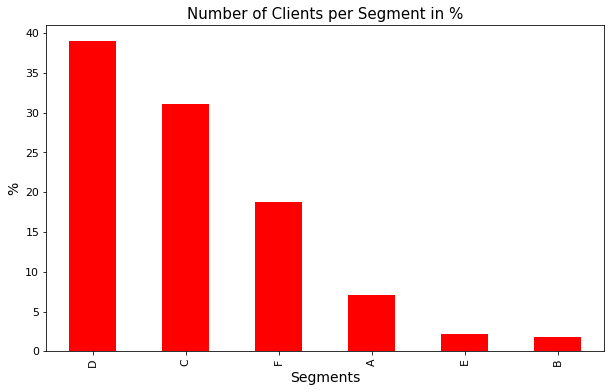

In [372]:
plt.figure(figsize=(10,6))
clients_transactions_df['Customer_segment'].value_counts(normalize=True).mul(100).plot(kind='bar', color='r')
plt.title('Number of Clients per Segment in %')
plt.xlabel('Segments')
plt.ylabel('%')
plt.savefig('graphs/Number_of_clients_per_segment_in_%.pdf')
#plt.close()

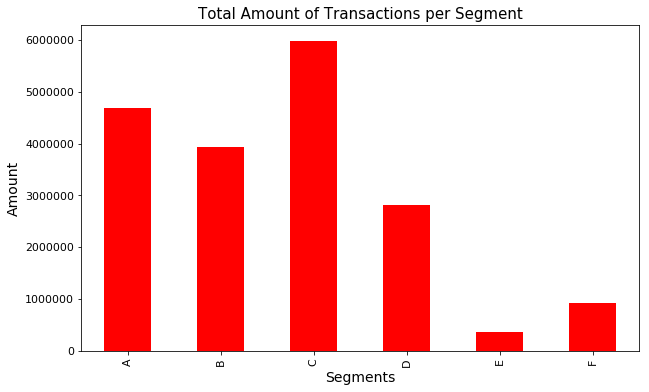

In [373]:
plt.figure(figsize=(10,6))
clients_transactions_df.groupby('Customer_segment').sum()['TransactionAmount'].plot(kind='bar', color='r')
plt.title('Total Amount of Transactions per Segment')
plt.xlabel('Segments')
plt.ylabel('Amount')
plt.savefig('graphs/Total_amount_of_transaction_per_segment.pdf')
#plt.close()
#clients_transactions_df.groupby('Customer_segment').mean()['TransactionAmount']

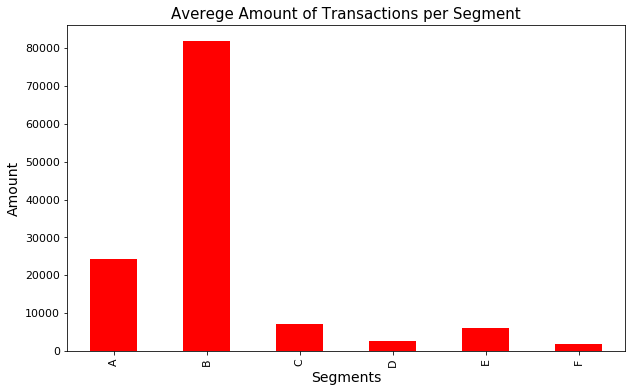

In [374]:
plt.figure(figsize=(10,6))
clients_transactions_df.groupby('Customer_segment').mean()['TransactionAmount'].plot(kind='bar', color='r')
plt.title('Averege Amount of Transactions per Segment')
plt.xlabel('Segments')
plt.ylabel('Amount')
plt.savefig('graphs/Average_amount_of_transaction_per_segment.pdf')
#plt.close()
#clients_transactions_df.groupby('Customer_segment').mean()['TransactionAmount']



new_df = clients_transactions_df[['TransactionDate', 'TransactionAmount', 'Customer_segment' ]]
new_df = new_df[new_df['Customer_segment'] == 'F']
fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 6 ))
plt.plot(new_df['TransactionDate'],new_df['TransactionAmount'])

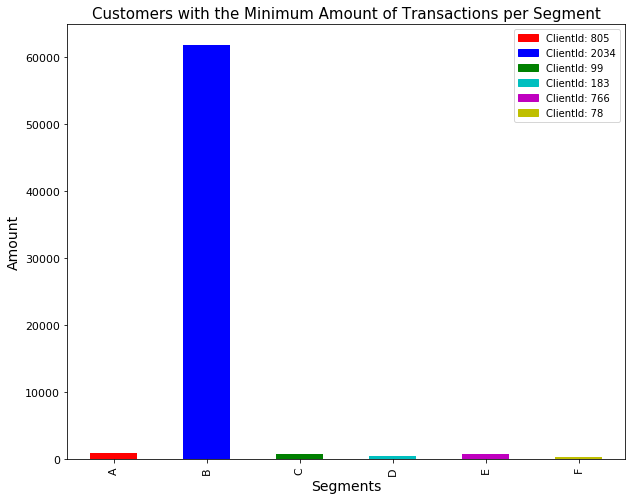

In [375]:
plt.figure(figsize=(10,8))
clients_transactions_df.groupby('Customer_segment').max().T
MIN = clients_transactions_df.groupby('Customer_segment').min()[['TransactionAmount']]
legend_min = clients_transactions_df.groupby('Customer_segment').min()[['ClientId']]
MIN['TransactionAmount'].plot(kind='bar', color=['r', 'b', 'g', 'c', 'm', 'y', 'k'])
r_patch = mpatches.Patch(color='r', label='ClientId: ' + str(legend_min['ClientId'][0]))
b_patch = mpatches.Patch(color='b', label='ClientId: ' + str(legend_min['ClientId'][1]))
g_patch = mpatches.Patch(color='g', label='ClientId: ' + str(legend_min['ClientId'][2]))
c_patch = mpatches.Patch(color='c', label='ClientId: ' + str(legend_min['ClientId'][3]))
m_patch = mpatches.Patch(color='m', label='ClientId: ' + str(legend_min['ClientId'][4]))
y_patch = mpatches.Patch(color='y', label='ClientId: ' + str(legend_min['ClientId'][5]))
plt.legend(handles=[r_patch, b_patch, g_patch, c_patch, m_patch,y_patch])
plt.title('Customers with the Minimum Amount of Transactions per Segment')
plt.xlabel('Segments')
plt.ylabel('Amount')
plt.savefig('graphs/Customers_with_the_Minimum_Amount_of_Transactions_per_Segment.pdf')
#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'

#plt.legend(, loc='best')
#plt.plot(x=MIN['Customer_segment'], y=MIN['TransactionAmount'], kind='bar')
#plt.plot(x=MIN['ClientId'], y=MIN['TransactionAmount'], kind='bar', color='g')

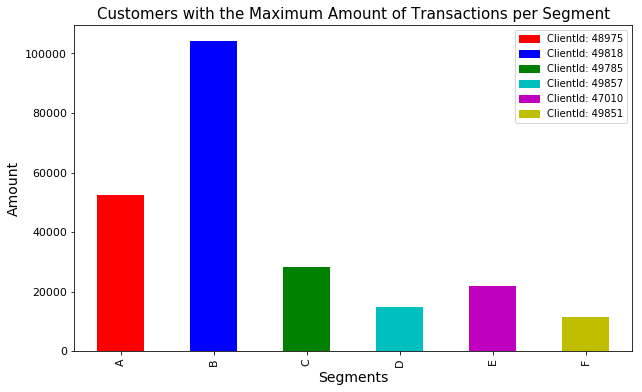

In [376]:
plt.figure(figsize=(10,6))
clients_transactions_df.groupby('Customer_segment').max().T
MIN = clients_transactions_df.groupby('Customer_segment').max()[['TransactionAmount']]
legend_max = clients_transactions_df.groupby('Customer_segment').max()[['ClientId']]
MIN['TransactionAmount'].plot(kind='bar', color=['r', 'b', 'g', 'c', 'm', 'y', 'k'])
r_patch = mpatches.Patch(color='r', label='ClientId: ' + str(legend_max['ClientId'][0]))
b_patch = mpatches.Patch(color='b', label='ClientId: ' + str(legend_max['ClientId'][1]))
g_patch = mpatches.Patch(color='g', label='ClientId: ' + str(legend_max['ClientId'][2]))
c_patch = mpatches.Patch(color='c', label='ClientId: ' + str(legend_max['ClientId'][3]))
m_patch = mpatches.Patch(color='m', label='ClientId: ' + str(legend_max['ClientId'][4]))
y_patch = mpatches.Patch(color='y', label='ClientId: ' + str(legend_max['ClientId'][5]))
plt.legend(handles=[r_patch, b_patch, g_patch, c_patch, m_patch,y_patch])
plt.title('Customers with the Maximum Amount of Transactions per Segment')
plt.xlabel('Segments')
plt.ylabel('Amount')
plt.savefig('graphs/Customers_with_the_Maximum_Amount_of_Transactions_per_Segment.pdf')

In [377]:
clients_transactions_df[clients_transactions_df['TransactionAmount'] == clients_transactions_df['TransactionAmount'].min()]
clients_transactions_df[clients_transactions_df['TransactionAmount'] == clients_transactions_df['TransactionAmount'].max()]

,ClientId,FirstName,LastName,Customer_segment,TransactionDate,TransactionAmount
344,17793,Eleni,Archuleta,B,2019-12-03,104304


In [378]:
clients_transactions_df.groupby('ClientId').max()['TransactionAmount']
clients_transactions_df.groupby('Customer_segment').count()[['TransactionAmount']]
clients_transactions_df.groupby('Customer_segment').max()
clients_transactions_df.groupby('Customer_segment').sum().groupby('ClientId').max()['TransactionAmount']
#clients_transactions_df.groupby('ClientId').sum().groupby('ClientId').max()['TransactionAmount']
clients_transactions_df.groupby('ClientId').sum()

,TransactionAmount
ClientId,
78,326
99,7103
164,3580
183,444
196,1289
...,...
49785,20195
49818,272409
49836,1332


In [379]:
A_segment = clients_transactions_df[clients_transactions_df['Customer_segment'] == 'A']
B_segment = clients_transactions_df[clients_transactions_df['Customer_segment'] == 'B']
C_segment = clients_transactions_df[clients_transactions_df['Customer_segment'] == 'C']
D_segment = clients_transactions_df[clients_transactions_df['Customer_segment'] == 'D']
E_segment = clients_transactions_df[clients_transactions_df['Customer_segment'] == 'E']
F_segment = clients_transactions_df[clients_transactions_df['Customer_segment'] == 'F']

In [380]:
A = A_segment.groupby('ClientId', as_index=False)[['TransactionAmount']].sum().max()
B = B_segment.groupby('ClientId', as_index=False)[['TransactionAmount']].sum().max()
C = C_segment.groupby('ClientId', as_index=False)[['TransactionAmount']].sum().max()
D = D_segment.groupby('ClientId', as_index=False)[['TransactionAmount']].sum().max()
E = E_segment.groupby('ClientId', as_index=False)[['TransactionAmount']].sum().max()
F = F_segment.groupby('ClientId', as_index=False)[['TransactionAmount']].sum().max()

In [381]:
segments = ['A','B','C','D','E','F']
max_tot_trans = [A[1], B[1], C[1], D[1], E[1], F[1]]
ClientId = [A[0], B[0], C[0], D[0], E[0], F[0]]

In [382]:
best_client_per_segment = pd.DataFrame(list(zip(segments, max_tot_trans,ClintTd)), 
               columns =['Customer_segment', 'max_tot_transactions', 'ClientId']) 

best_client_per_segment

,Customer_segment,max_tot_transactions,ClientId
0,A,152220,48975
1,B,411593,49818
2,C,73827,49785
3,D,30760,49857
4,E,48982,47010
5,F,19283,49851


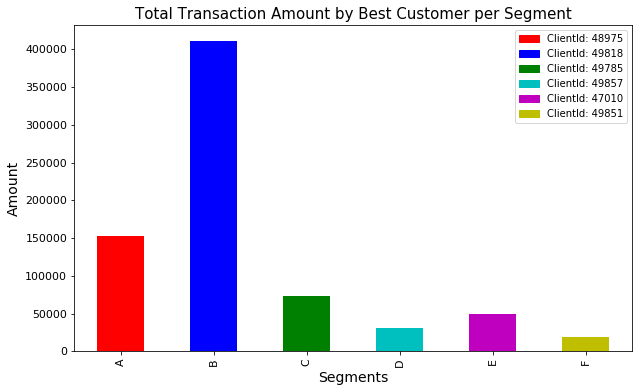

In [383]:
plt.figure(figsize=(10,6))
best_client_per_segment.groupby('Customer_segment').max()['max_tot_transactions'].plot(x= best_client_per_segment['Customer_segment'],kind='bar', color=['r', 'b', 'g', 'c', 'm', 'y', 'k'])
r_patch = mpatches.Patch(color='r', label='ClientId: ' + str(best_client_per_segment['ClientId'][0]))
b_patch = mpatches.Patch(color='b', label='ClientId: ' + str(best_client_per_segment['ClientId'][1]))
g_patch = mpatches.Patch(color='g', label='ClientId: ' + str(best_client_per_segment['ClientId'][2]))
c_patch = mpatches.Patch(color='c', label='ClientId: ' + str(best_client_per_segment['ClientId'][3]))
m_patch = mpatches.Patch(color='m', label='ClientId: ' + str(best_client_per_segment['ClientId'][4]))
y_patch = mpatches.Patch(color='y', label='ClientId: ' + str(best_client_per_segment['ClientId'][5]))
plt.legend(handles=[r_patch, b_patch, g_patch, c_patch, m_patch,y_patch])
plt.title('Total Transaction Amount by Best Customer per Segment')
plt.xlabel('Segments')
plt.ylabel('Amount')
plt.savefig('graphs/Total_Transaction_Amount_by_Best_Customer_per_Segment.pdf')

In [384]:
## import matplotlib.pylab as pylab
params = {'legend.fontsize': 10,
         'axes.labelsize': 14,
         'axes.titlesize':15,
         'xtick.labelsize':11,
         'ytick.labelsize':11}
pylab.rcParams.update(params)

# Q2: Sales per region
Three years ago (2017), there was a new strategic decision made by your CEO to shift the sales from the US towards Asia. Now that we are in the beginning of 2020 and the complete sales numbers of 2019 were retrieved, along with the forecasts for 2020, it is time to look back over our evolution. We started selling our products in 2012. Back then (2012) we had a sales target of 18K units sold. In 2014, we experienced some production issues, resulting in less units sold. Then came 2017, where we decided to follow the recent market trends and shift our sales from the US to Asia. Building on those historical trends, our sales analytics team has come up with the forecasts for 2020. You have at your disposal one csv file (“STATS406_Assignment_1.2_unit_sales_per_region.csv”) that contains per month and year the unit sales sold (or forecasted to be sold in 2020) per region. You are asked to aggregate them on a yearly basis and analyse our past, current and forecasted units sold. As well as the impact/results of the sales shift. You can do this at a total level (entire world) or per region or both.

In [385]:
#to_datetime(df_sub['year'].astype(str)  + df_sub['Months'], format='%Y%B')

In [386]:
sales_df = pd.read_csv("STATS406_Assignment_1.2_unit_sales_per_region.csv")
#sales_df['Month_year'] =  pd.to_datetime(sales_df['Month_year'], infer_datetime_format=True)


In [387]:
def convert_to_time(month_year):
    month_year_list = month_year.split('_')    
    month = month_year_list[0]
    year = month_year_list[1] 
    month_year = month + '-' + year    
    #month_year = pd.to_datetime(['{}-{}'.format(month, year)])
    
    month_year = pd.to_datetime(month_year, infer_datetime_format=True )
    #month_year = pd.to_datetime(month+ '-' + year ,format='%Y%B' )
    return month_year
    
month_year = sales_df['Month_year'][0]
month_year = convert_to_time(month_year)
month_year

Timestamp('2012-01-01 00:00:00')

In [388]:
#lambda row : normalize(row['X']
sales_df['Month_year'] = sales_df.apply(lambda row : convert_to_time(row['Month_year']), axis = 1)
#sales_df['Month_year'] =  pd.to_datetime(sales_df['Month_year'], infer_datetime_format=True)

In [389]:
pd.DatetimeIndex(sales_df['Month_year']).year

Int64Index([2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='Month_year', length=108)

In [390]:
sales_df.head(20)

,Month_year,US,Europe,Asia,RoW
0,2012-01-01,1097,258,172,52
1,2012-02-01,1087,403,191,55
2,2012-03-01,1065,555,228,35
3,2012-04-01,1047,195,315,32
4,2012-05-01,991,579,320,18
5,2012-06-01,1110,335,340,54
6,2012-07-01,1138,338,293,50
7,2012-08-01,1267,518,365,51
8,2012-09-01,1090,432,415,35
9,2012-10-01,1271,528,311,44


In [391]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month_year  108 non-null    datetime64[ns]
 1   US          108 non-null    int64         
 2   Europe      108 non-null    int64         
 3   Asia        108 non-null    int64         
 4   RoW         108 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 4.3 KB


In [392]:
sales_df.describe()

,US,Europe,Asia,RoW
count,108.000000,108.000000,108.000000,108.000000
mean,1031.407407,536.750000,413.648148,38.712963
std,182.325427,138.856285,203.921385,14.264557
min,594.000000,195.000000,50.000000,12.000000
25%,885.000000,457.000000,264.250000,28.750000
50%,1046.000000,543.500000,364.500000,36.000000
75%,1181.750000,646.500000,510.500000,48.250000
max,1348.000000,872.000000,850.000000,75.000000


In [393]:
sales_df.groupby(pd.DatetimeIndex(sales_df['Month_year']).year).sum()
#sales_df = sales_df.groupby([(sales_df.index.year)]).sum()

,US,Europe,Asia,RoW
Month_year,,,,
2012,13489,5009,3499,462
2013,13349,5558,3780,448
2014,10465,4249,2947,424
2015,13908,6039,3519,412
2016,14360,6690,3769,415
2017,14630,7111,4540,483
2018,11490,7382,5228,530
2019,10200,7931,7891,509
2020,9501,8000,9501,498


In [394]:
#sales_df['year'] = df['date'].apply(lambda x: str(x.year) + ' ' + str(x.month))
#grouped = df.groupby('year-month')
sales_df[(pd.DatetimeIndex(sales_df['Month_year']).year) == 2014].sum()

US        10465
Europe     4249
Asia       2947
RoW         424
dtype: int64

<Figure size 1008x576 with 0 Axes>

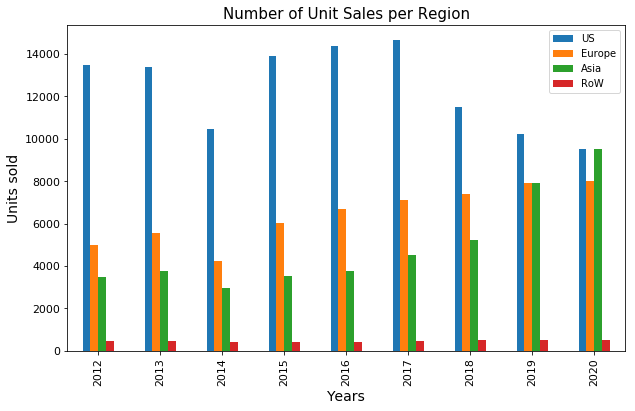

In [395]:
plt.figure(figsize=(14,8))
sales_df.groupby(pd.DatetimeIndex(sales_df['Month_year']).year).sum().plot(kind='bar',legend=False,figsize=(10,6))
plt.legend(loc='best')
plt.title('Number of Unit Sales per Region')
plt.xlabel('Years')
plt.ylabel('Units sold')
plt.savefig('graphs/Number_of_Unit_Salesper_Region.pdf')

<Figure size 1008x576 with 0 Axes>

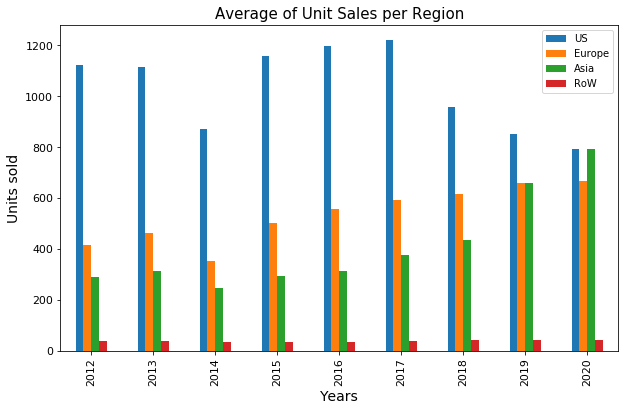

In [396]:
plt.figure(figsize=(14,8))
sales_df.groupby(pd.DatetimeIndex(sales_df['Month_year']).year).mean().plot(kind='bar',legend=False,figsize=(10,6))
plt.legend(loc='best')
plt.title('Average of Unit Sales per Region')
plt.xlabel('Years')
plt.ylabel('Units sold')
plt.savefig('graphs/Average_of_Unit_Sales_per_Region.pdf')

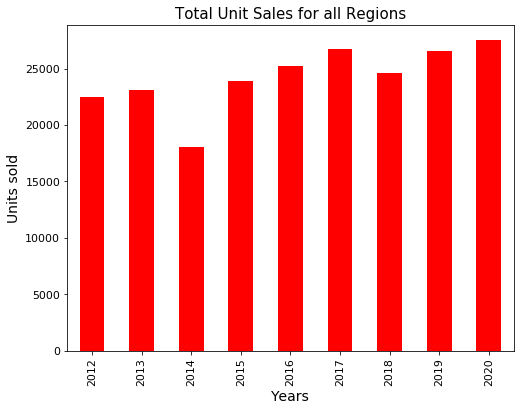

In [397]:
tt = sales_df.groupby(pd.DatetimeIndex(sales_df['Month_year']).year).sum()
tt.sum(axis=1).plot(kind='bar',color='r',legend=False,figsize=(8,6))
plt.title('Total Unit Sales for all Regions')
plt.xlabel('Years')
plt.ylabel('Units sold')
plt.savefig('graphs/Total_Unit_Sales_for_all_Regions.pdf')

In [398]:
year_2020

,Month_year,US,Europe,Asia,RoW
96,2020-01-01,713,538,714,28
97,2020-02-01,594,666,801,28
98,2020-03-01,821,578,848,36
99,2020-04-01,917,645,720,43
100,2020-05-01,627,715,739,68
101,2020-06-01,719,721,709,28
102,2020-07-01,777,683,850,28
103,2020-08-01,817,872,817,36
104,2020-09-01,916,785,848,59
105,2020-10-01,779,560,818,35


In [399]:
year_2020 = sales_df[(pd.DatetimeIndex(sales_df['Month_year']).year) == 2020]
year_2019 = sales_df[(pd.DatetimeIndex(sales_df['Month_year']).year) == 2019]

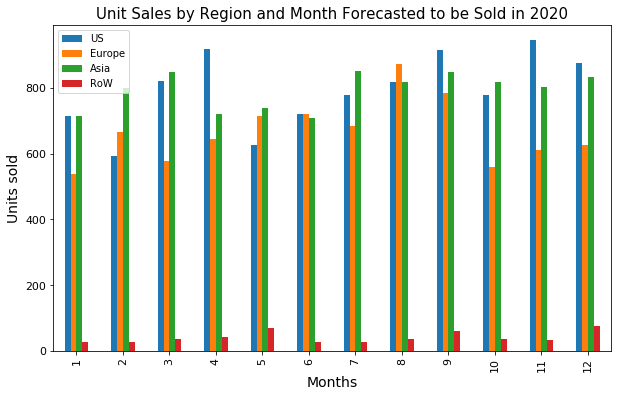

In [400]:
year_2020.groupby(pd.DatetimeIndex(year_2020['Month_year']).month).sum().plot(kind='bar',figsize=(10,6))
plt.title('Unit Sales by Region and Month Forecasted to be Sold in 2020')
plt.xlabel('Months')
plt.ylabel('Units sold')
plt.savefig('graphs/Unit_Sales_by_Region_and_Month_Forecasted_to_be_Sold_in_2020.pdf')

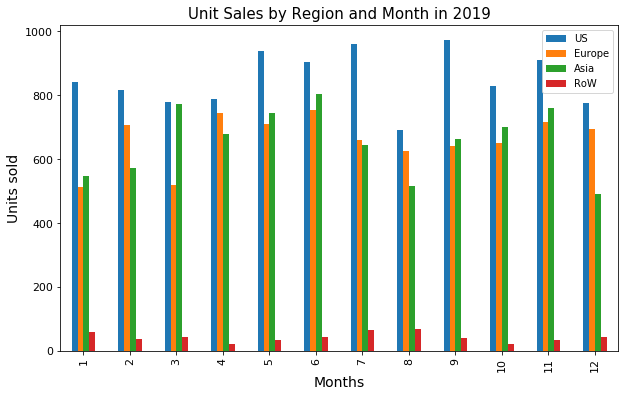

In [401]:
year_2019.groupby(pd.DatetimeIndex(year_2019['Month_year']).month).sum().plot(kind='bar',figsize=(10,6))
plt.title('Unit Sales by Region and Month in 2019')
plt.xlabel('Months')
plt.ylabel('Units sold')
plt.savefig('graphs/Unit_Sales_by_Region_and_Month_in_2019.pdf')

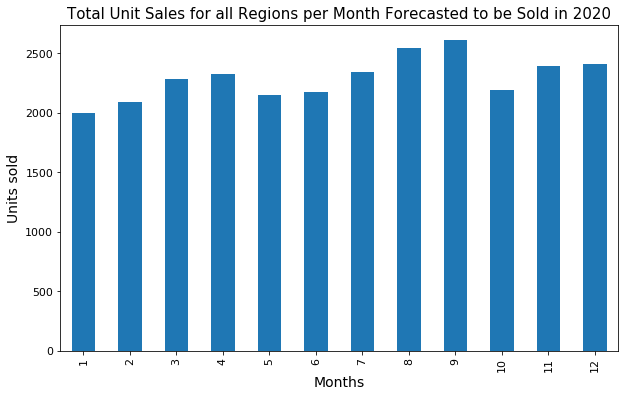

In [402]:
year_2020.groupby(pd.DatetimeIndex(year_2020['Month_year']).month).sum().sum(axis = 1).plot(kind='bar',figsize=(10,6))
plt.title('Total Unit Sales for all Regions per Month Forecasted to be Sold in 2020')
plt.xlabel('Months')
plt.ylabel('Units sold')
plt.savefig('graphs/Total_Unit_sales_for_all_regions_per_month_forecasted_to_be_sold_in_2020.pdf')

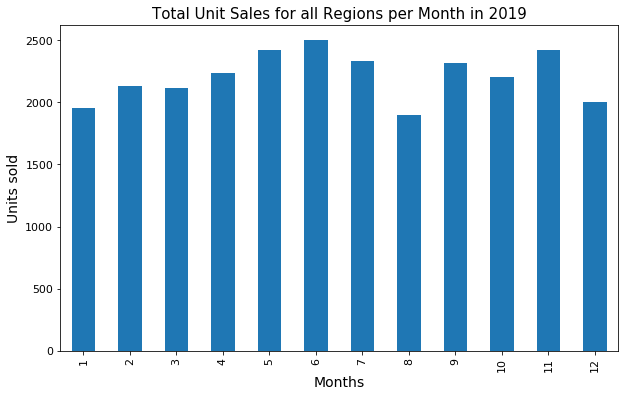

In [403]:
year_2019.groupby(pd.DatetimeIndex(year_2020['Month_year']).month).sum().sum(axis = 1).plot(kind='bar',figsize=(10,6))
plt.title('Total Unit Sales for all Regions per Month in 2019')
plt.xlabel('Months')
plt.ylabel('Units sold')
plt.savefig('graphs/Total_Unit_Sales_for_all_Regions_per_Month_in_2019.pdf')